In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('03_Cleaned_File(Data Preprocessing).csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [4]:
X = df.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [5]:
y.value_counts() # Dataset Imbalanced

Exited
0    7960
1    2037
Name: count, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [7]:
num_features = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), num_features)],
                                 remainder = 'passthrough',
                                 force_int_remainder_cols=False)

In [8]:
steps = [("preprocess", preprocessor),
         ("undersampling", RandomUnderSampler(random_state = 42)),
         ("logistic_regression", LogisticRegression(random_state = 42))]

In [9]:
steps

[('preprocess',
  ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                    transformers=[('num', StandardScaler(),
                                   ['CreditScore', 'Age', 'EstimatedSalary',
                                    'Balance'])])),
 ('undersampling', RandomUnderSampler(random_state=42)),
 ('logistic_regression', LogisticRegression(random_state=42))]

In [10]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'EstimatedSalary',
                                                   'Balance'])])),
                ('undersampling', RandomUnderSampler(random_state=42)),
                ('logistic_regression', LogisticRegression(random_state=42))])

In [11]:
y.value_counts()

Exited
0    7960
1    2037
Name: count, dtype: int64

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'EstimatedSalary',
                                                   'Balance'])])),
                ('undersampling', RandomUnderSampler(random_state=42)),
                ('logistic_regression', LogisticRegression(random_state=42))])

In [13]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1738  651]
 [ 172  439]]


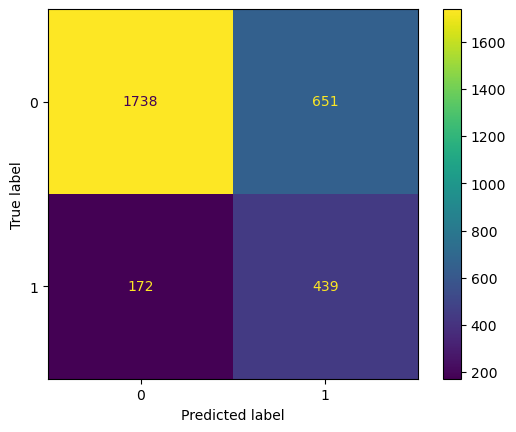

In [15]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [16]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.73
Class 1 Accuracy: 0.72


In [17]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.73
Precision : 0.40
Recall : 0.72
F1 Score : 0.52


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2389
           1       0.40      0.72      0.52       611

    accuracy                           0.73      3000
   macro avg       0.66      0.72      0.66      3000
weighted avg       0.81      0.73      0.75      3000



In [21]:
y_prob = pipe.predict_proba(X_test)[:, 1]
y_prob

array([0.34920606, 0.59301163, 0.17795114, ..., 0.2929076 , 0.21010663,
       0.24222878])

In [22]:
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
print(f"ROC-AUC Score:{roc_auc:.2f}")
print(f"PR-AUC Score:{pr_auc:.2f}")

ROC-AUC Score:0.79
PR-AUC Score:0.47


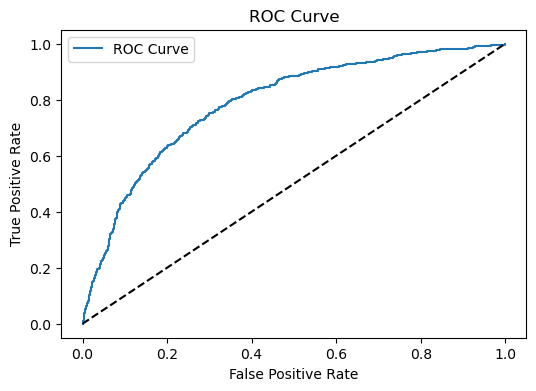

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

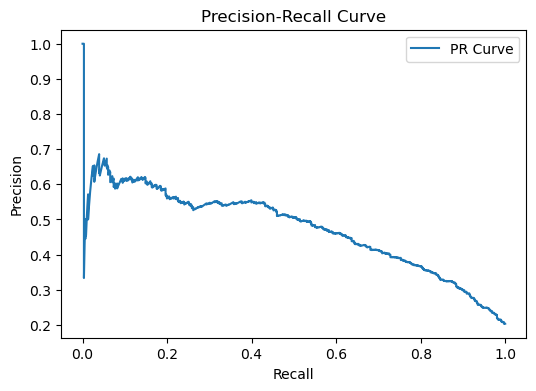

In [25]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()